In [25]:
import numpy as np
import tensorflow as tf
from keras import layers
from PIL import Image
from IPython.display import display
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Model
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


In [26]:
target_image_size = (75, 75)
model_name = ''
num_classes = 17

In [27]:
interpreter = tf.lite.Interpreter(model_path='model.tflite')
interpreter.allocate_tensors()


In [28]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        'Dataset_3Devices/test',
        target_size=target_image_size,
        batch_size=1,
        class_mode='categorical',
        shuffle=False
)


Found 510 images belonging to 17 classes.


In [29]:

# 载入标签
with open("labels.txt", "r") as f:
    class_names = f.read().splitlines()

# 对测试集进行推断
predictions = []
true_labels = []

for i in range(len(test_generator)):
    images, labels = test_generator[i]
    true_labels.extend(np.argmax(labels, axis=1))
    
    # 将图像输入到TFLite模型进行推断
    interpreter.set_tensor(interpreter.get_input_details()[0]['index'], images)
    interpreter.invoke()
    output_tensor = interpreter.get_tensor(interpreter.get_output_details()[0]['index'])
    predictions.extend(np.argmax(output_tensor, axis=1))

# 将预测结果与标签对应起来
predicted_labels = [class_names[prediction] for prediction in predictions]
true_labels = [class_names[label] for label in true_labels]

# 计算准确率
accuracy = accuracy_score(true_labels, predicted_labels)
print("准确率：", accuracy)




准确率： 0.9372549019607843


In [30]:
from sklearn.metrics import classification_report

# 生成分类报告
report = classification_report(true_labels, predicted_labels)
print(report)


              precision    recall  f1-score   support

         1-1       1.00      1.00      1.00        30
         1-2       1.00      1.00      1.00        30
         2-1       1.00      1.00      1.00        30
         2-2       0.83      1.00      0.91        30
         3-1       0.89      0.80      0.84        30
         3-2       0.87      0.87      0.87        30
         4-1       1.00      0.97      0.98        30
         4-2       0.69      0.97      0.81        30
         5-1       1.00      0.83      0.91        30
         5-2       0.95      0.70      0.81        30
         6-1       1.00      0.90      0.95        30
         6-2       1.00      1.00      1.00        30
         6-3       1.00      1.00      1.00        30
         7-1       0.97      0.93      0.95        30
         8-1       0.91      0.97      0.94        30
         8-2       1.00      1.00      1.00        30
         8-3       0.97      1.00      0.98        30

    accuracy              

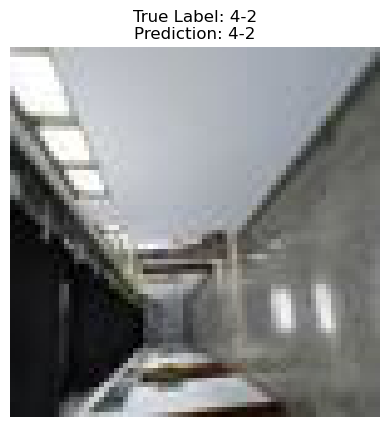

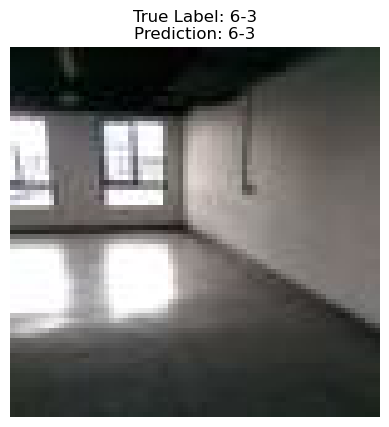

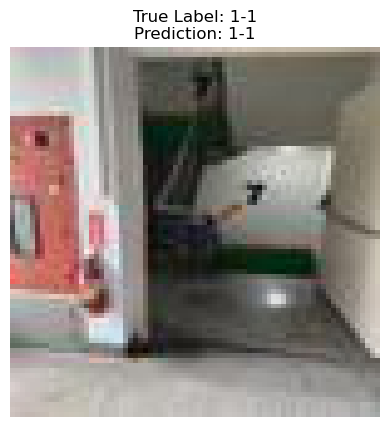

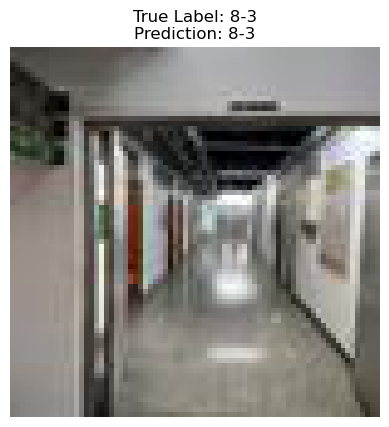

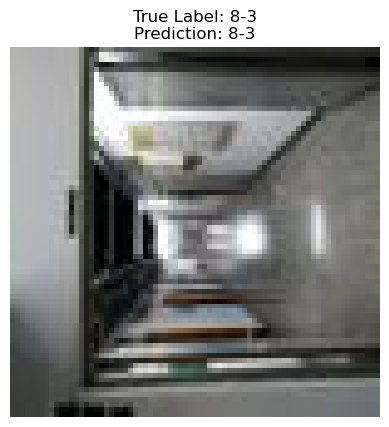

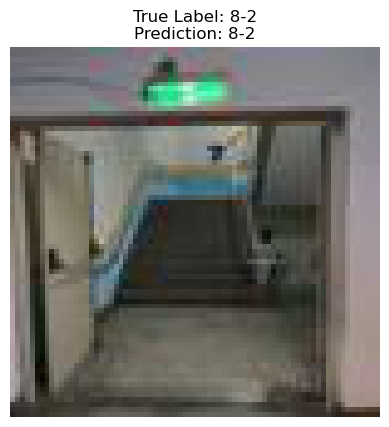

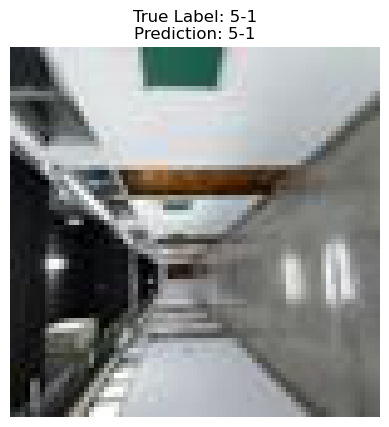

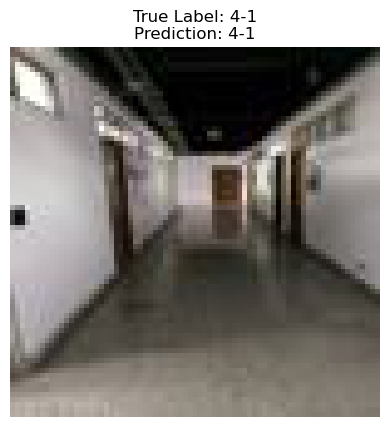

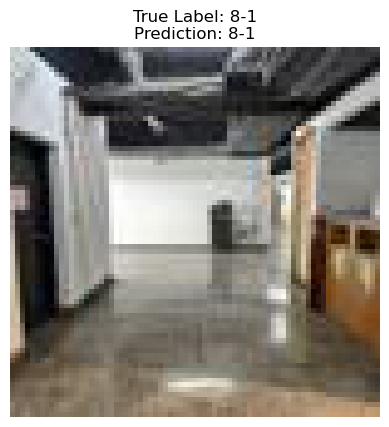

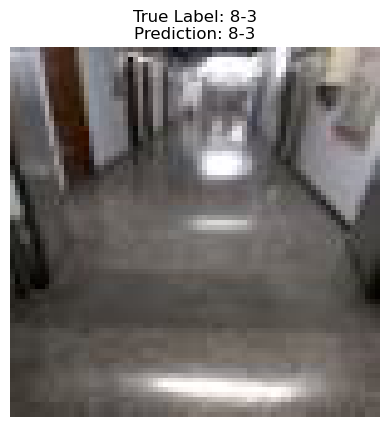

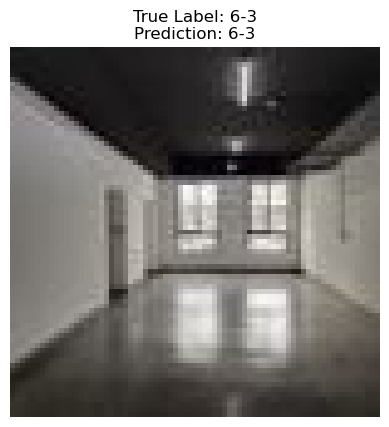

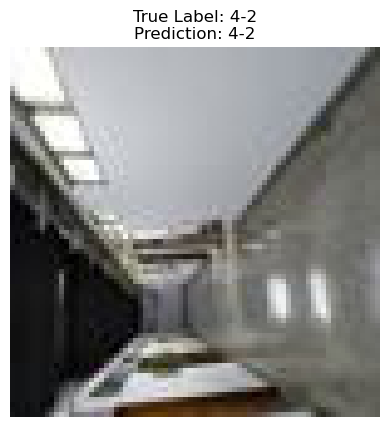

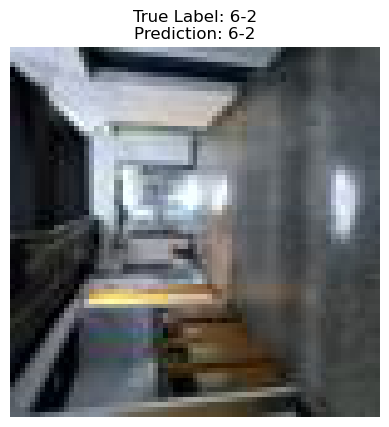

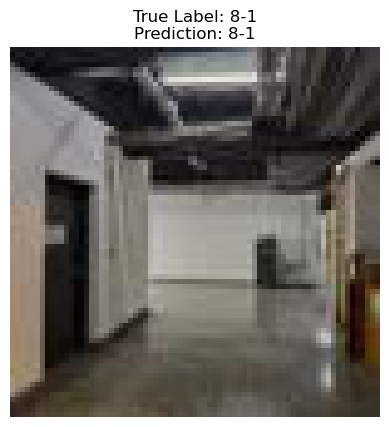

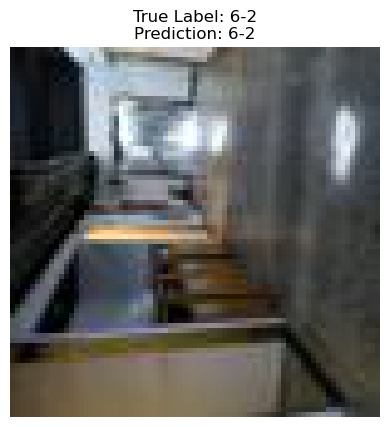

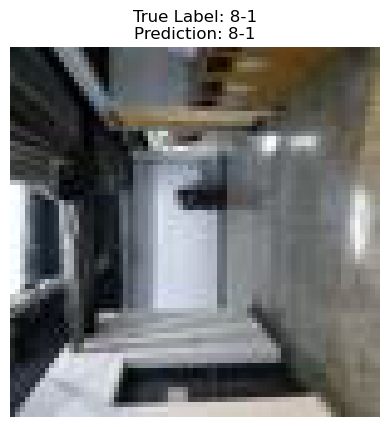

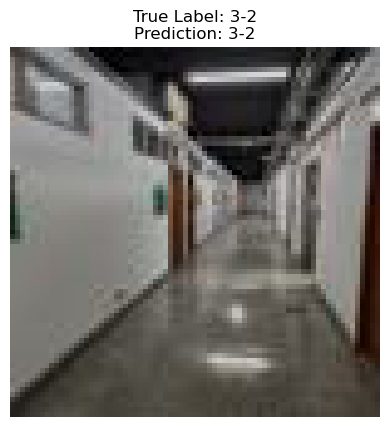

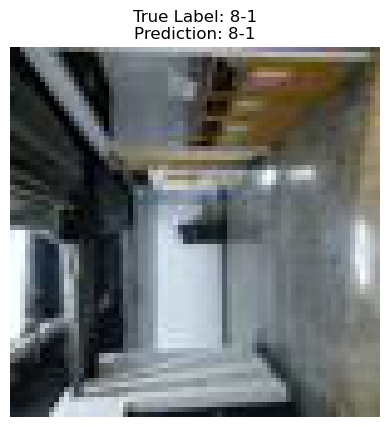

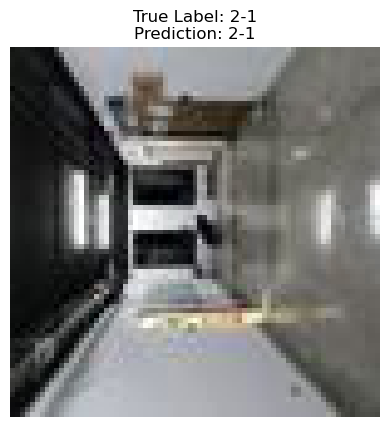

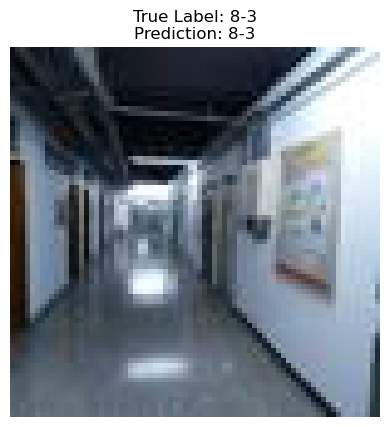

In [32]:
import random
import matplotlib.pyplot as plt

# 随机选择要显示的图像数量
num_images = 20
random_indices = random.sample(range(len(test_generator)), num_images)

# 逐个显示图像和预测结果
for index in random_indices:
    image, label = test_generator[index]
    image = image[0]  # 从 batch 中取出单张图像
    label = class_names[np.argmax(label)]  # 获取真实标签
    prediction = predicted_labels[index]  # 获取预测标签
    
    # 显示图像和预测结果
    plt.imshow(image)
    plt.title(f"True Label: {label}\nPrediction: {prediction}")
    plt.axis('off')
    plt.show()
